In [1]:
!pip install pyarrow

     |████████████████████████████████| 17.7 MB 9.3 MB/s eta 0:00:01


In [2]:
!echo

In [3]:
import pandas as pd
import numpy as np

PREPATH = "/project/L/datasets/clean-collection"
df2017 = [
    "/cicids2017-clean/Friday-WorkingHours-Afternoon-DDoS.pcap_ISCX.csv",
    "/cicids2017-clean/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "/cicids2017-clean/Friday-WorkingHours-Morning-Botnet.pcap_ISCX.csv",
    "/cicids2017-clean/Thursday-WorkingHours-Afternoon-Infiltration.pcap_ISCX.csv",
    "/cicids2017-clean/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "/cicids2017-clean/Tuesday-WorkingHours-Bruteforce.pcap_ISCX.csv",
    "/cicids2017-clean/Wednesday-workingHours-DoS.pcap_ISCX.csv"
]
df2017_2 = [
    "/cicdos2017-clean/cicdos2017.csv"
]
df2018 = [
    "/cicids2018-clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Tuesday-20-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv",
    "/cicids2018-clean/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv"
]

df2019 = [
    "/cicddos2019-clean/01_12_DrDoS_DNS.csv",
    "/cicddos2019-clean/01_12_DrDoS_LDAP.csv",
    "/cicddos2019-clean/01_12_DrDoS_MSSQL.csv",
    "/cicddos2019-clean/01_12_DrDoS_NetBIOS.csv",
    "/cicddos2019-clean/01_12_DrDoS_NTP.csv",
    "/cicddos2019-clean/01_12_DrDoS_SNMP.csv",
    "/cicddos2019-clean/01_12_DrDoS_SSDP.csv",
    "/cicddos2019-clean/01_12_DrDoS_UDP.csv",
    "/cicddos2019-clean/01_12_Syn.csv",
    "/cicddos2019-clean/01_12_TFTP.csv",
    "/cicddos2019-clean/01_12_UDPLag.csv",
    "/cicddos2019-clean/03_11_LDAP.csv",
    "/cicddos2019-clean/03_11_MSSQL.csv",
    "/cicddos2019-clean/03_11_NetBIOS.csv",
    "/cicddos2019-clean/03_11_Portmap.csv",
    "/cicddos2019-clean/03_11_Syn.csv",
    "/cicddos2019-clean/03_11_UDP.csv",
    "/cicddos2019-clean/03_11_UDPLag.csv"
]
dfs_names = [df2017, df2017_2, df2018, df2019]

In [4]:
dfs = {}
i = 0
for dataset in dfs_names:
    for path in dataset:
        dfs[i] = pd.read_csv(f'{PREPATH}{path}', low_memory=False, header=0, names= ["destination port", "protocol", "timestamp", "flow duration", "total fwd packets", "total backward packets", "total length of fwd packets", "total length of bwd packets", "fwd packet length max", "fwd packet length min", "fwd packet length mean", "fwd packet length std", "bwd packet length max", "bwd packet length min", "bwd packet length mean", "bwd packet length std", "flow bytes/s", "flow packets/s", "flow iat mean", "flow iat std", "flow iat max", "flow iat min", "fwd iat total", "fwd iat mean", "fwd iat std", "fwd iat max", "fwd iat min", "bwd iat total", "bwd iat mean", "bwd iat std", "bwd iat max", "bwd iat min", "fwd psh flags", "bwd psh flags", "fwd urg flags", "bwd urg flags", "fwd header length", "bwd header length", "fwd packets/s", "bwd packets/s", "min packet length", "max packet length", "packet length mean", "packet length std", "packet length variance", "fin flag count", "syn flag count", "rst flag count", "psh flag count", "ack flag count", "urg flag count", "cwe flag count", "ece flag count", "down/up ratio", "average packet size", "avg fwd segment size", "avg bwd segment size", "fwd avg bytes/bulk", "fwd avg packets/bulk", "fwd avg bulk rate", "bwd avg bytes/bulk", "bwd avg packets/bulk", "bwd avg bulk rate", "subflow fwd packets", "subflow fwd bytes", "subflow bwd packets", "subflow bwd bytes", "init_win_bytes_forward", "init_win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "active mean", "active std", "active max", "active min", "idle mean", "idle std", "idle max", "idle min", "label"])
        i+=1

FileNotFoundError: [Errno 2] File /project/L/datasets/clean-collection/cicids2017-clean/Friday-WorkingHours-Afternoon-DDoS.pcap_ISCX.csv does not exist: '/project/L/datasets/clean-collection/cicids2017-clean/Friday-WorkingHours-Afternoon-DDoS.pcap_ISCX.csv'

In [5]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        print(df)

# display_all(df_raw.tail().T)
# display_all(df_raw.describe(include='all').T)
# display_all(df_raw.dtypes)

In [7]:
# Niet altijd gewenst, maar timestamp kan nuttig zijn voor tijdsgebonden classificatiemethoden, anders drop je timestamp
def process_time(t):
    t = t.split(' ')[-1]
    h, m = t.split(':')
    return 3600*int(h)+60*int(m)

# Time, split date off, translate time to seconds
# df_raw['timestamp'] = df_raw['timestamp'].apply(process_time)
#for attack, path in pathscicids2017.items() :
#    dfs[attack]['timestamp'] = dfs[attack]['timestamp'].apply(process_time)
    
#for attack, path in pathcidos2017.items():
#    dfs_2[attack]['timestamp'] = dfs_2[attack]['timestamp'].apply(process_time)
    
#for attack, path in pathscicids2018.items():
#    dfs_3[attack]['timestamp'] = dfs_3[attack]['timestamp'].apply(process_time)
    
#for attack, path in pathscicdos2019.items():
#    dfs_4[attack]['timestamp'] = dfs_4[attack]['timestamp'].apply(process_time)
# Het verwijderen van destination port en protocol zijn aangeraden. Hoewel ze nuttige informatie bevatten, kan een gebrek aan variatie in de datasets zorgen voor de herkenning van dataset-specifieke patronen.
for i, path in dfs.items():
    dfs[i] = dfs[i].drop(["destination port", "protocol", "timestamp"], axis=1)

In [8]:
# Dit stuk mapt alle labels in [0,1]. Er blijven geen individuele attacks over. Indien je toch zou willen testen op individuele attacks in subsets kan je de categorical tooling van pandas gebruiken
# Translate string attack types to numbers
for i, path in dfs.items():
    attack_types = dfs[i]["label"].unique()
    _ = np.where(attack_types == "Benign")
    attack_types = np.delete(attack_types, _)
    _ = np.where(attack_types == "BENIGN")
    attack_types = np.delete(attack_types, _)
    attack_dict = {"Benign": 0, "BENIGN": 0}
    for _ in range(0, len(attack_types)):
        attack_dict[attack_types[_]] = 1
    dfs[i]["label"] = dfs[i]["label"].apply(lambda x: attack_dict[x])

In [9]:
# Als je string values zou tegenkomen (wat gebeurde met de literal Infinity in subsets van CIC-IDS2017)
for i, path in dfs.items():
    dfs[i] = dfs[i].replace(["Infinity", "Inf"], np.nan)
# display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

In [10]:
# Clipping om kolommen in float32 / int32 te krijgen. Het kan zijn dat je wil werken met andere types (float16, bf16 etc.), dan pas je maar aan
for i, path in dfs.items():
    float_cols = list(dfs[i].select_dtypes(include='float64').columns)
    print(f"float64 cols: {float_cols}")
    dfs[i][float_cols] = dfs[i][float_cols].clip(lower=np.finfo(np.float32).min, upper=np.finfo(np.float32).max)
    dfs[i][float_cols] = dfs[i][float_cols].astype(dtype='float32')
    # Shouldn't print any indices
    print(np.where(dfs[i].values >= np.finfo(np.float32).max))
    print(np.where(dfs[i].values <= np.finfo(np.float32).min))

float64 cols: ['fwd packet length mean', 'fwd packet length std', 'bwd packet length mean', 'bwd packet length std', 'flow bytes/s', 'flow packets/s', 'flow iat mean', 'flow iat std', 'fwd iat mean', 'fwd iat std', 'bwd iat mean', 'bwd iat std', 'fwd packets/s', 'bwd packets/s', 'packet length mean', 'packet length std', 'packet length variance', 'average packet size', 'avg fwd segment size', 'avg bwd segment size', 'active mean', 'active std', 'idle mean', 'idle std']
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
float64 cols: ['fwd packet length mean', 'fwd packet length std', 'bwd packet length mean', 'bwd packet length std', 'flow bytes/s', 'flow packets/s', 'flow iat mean', 'flow iat std', 'fwd iat mean', 'fwd iat std', 'bwd iat mean', 'bwd iat std', 'fwd packets/s', 'bwd packets/s', 'packet length mean', 'packet length std', 'packet length variance', 'average packet size', 'avg fwd segment size', 'avg bwd segment size', 'active 

In [ ]:
for i, path in dfs.items():
    print("Final type check")
    display_all(dfs[i].dtypes)

In [ ]:
for i, path in dfs.items():
    dfs[i], NAlist = reduce_mem_usage(dfs[i])

In [14]:
# Feather formaat, memory layout -> disk
# Als je preprocessing pipeline af is, sla dan de versies van je dataset op in feather formaat
# Als je er mee wil werken kan je direct je dataframe krijgen via pd.read_feather(...)
# Reductie voor bv. cicids2017-clean/Friday-WorkingHours-Afternoon-DDoS.pcap_ISCX.csv ~90 MB -> 21.5 MB
# Reductie met dtypes te corrigeren: 21.5 MB -> 20.7 MB
teller = 0
i = 0
for dataset in dfs_names:
    for path in dataset:
        dfs[i].to_feather('./Datasets/local/'+path.split('/')[2].split('.')[0])
        i+=1

# Load datasets

In [46]:
dfs = {}
for dataset in dfs_names:
    for path in dataset:
        index = path.split('/')[2].split('.')[0]
        dfs[index] = pd.read_feather('./Datasets/local/'+ index)

# High Correlation filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.


In [12]:
freq = {}
for j, path in dfs.items():
    cor = dfs[j].corr()
    cor_target = abs(cor["label"]).fillna(0)
    for name, i in cor_target.items():
        if name in freq:
            freq[name]+=i
        else :
            freq[name]=i

In [48]:
sort_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
for i in sort_freq:
    print(i[0], "\t", i[1]/36)

label 	 1.0
min packet length 	 0.4815614563742916
fwd packet length mean 	 0.47208471194289003
avg fwd segment size 	 0.47208471194289003
average packet size 	 0.4709640576101813
fwd packet length min 	 0.4545167307162892
packet length mean 	 0.4479171125015575
urg flag count 	 0.32518252413091103
flow packets/s 	 0.32152740436070587
fwd packets/s 	 0.31987833439202173
down/up ratio 	 0.31825098918534334
fwd packet length max 	 0.3167404296168288
flow bytes/s 	 0.3082525852489463
ack flag count 	 0.27547888362017664
bwd packet length min 	 0.2636599036842527
bwd packet length mean 	 0.25614339528412094
avg bwd segment size 	 0.25614339528412094
packet length std 	 0.25031894672898686
max packet length 	 0.247093404441688
bwd packet length std 	 0.21605427671213073
bwd packet length max 	 0.2157607861385228
init_win_bytes_forward 	 0.20574519154175933
init_win_bytes_backward 	 0.20573399131774045
fwd packet length std 	 0.20455386986616567
rst flag count 	 0.19738752202069232
packet le

# Univariate feature selection with F-test for feature scoring
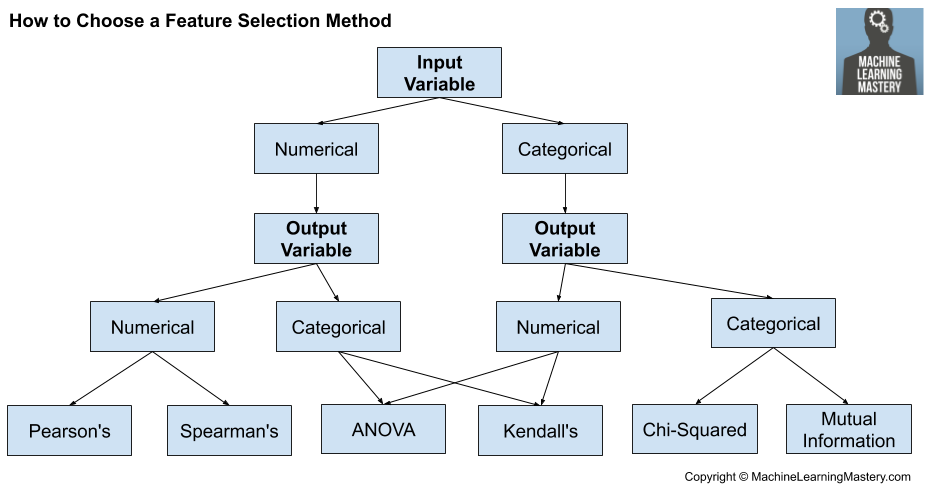

#### Analysis of Variance (ANOVA) correlation coefficient (linear)
F = variation between sample means / variation within the samples

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
from matplotlib import pyplot as plt
from sklearn.feature_selection import GenericUnivariateSelect, f_classif

freq_table = {}
for j, path in dfs.items():
    selector = GenericUnivariateSelect(f_classif, mode='k_best', param="all")
    selector.fit_transform(dfs[j], dfs[j]['label'])
    scores = dict(zip(dfs[j].columns, np.nan_to_num(selector.scores_)))
    for name, i in scores.items():
        if name in freq_table:
            freq_table[name]+=i
        else :
            freq_table[name]=i

In [49]:
sort_freq_table = sorted(freq_table.items(), key=lambda x: x[1], reverse=True)
for i in sort_freq_table:
    print(i[0], "\t", i[1])

label 	 inf
init_win_bytes_backward 	 111304320.16194242
fwd packet length max 	 47485009.15448202
fwd packet length std 	 35380875.68399271
subflow fwd bytes 	 27576317.317282498
total length of fwd packets 	 27576286.341789685
fwd packet length mean 	 25817178.45735503
avg fwd segment size 	 25817178.45735503
max packet length 	 10086376.629290206
packet length std 	 9875573.322184822
average packet size 	 9784058.76193859
packet length mean 	 9630192.401703965
packet length variance 	 8920402.878020383
fwd header length 	 5771168.852421291
min packet length 	 4558606.417158634
total fwd packets 	 4387830.83881423
subflow fwd packets 	 4387830.83881423
min_seg_size_forward 	 4315010.099370472
bwd packet length mean 	 3183837.4582489696
avg bwd segment size 	 3183837.4582489696
fwd packet length min 	 3056289.8378208037
bwd packet length std 	 2469355.107083849
psh flag count 	 1998652.1938626198
act_data_pkt_fwd 	 1968873.8939706765
bwd packet length max 	 1919865.9953725082
init_win

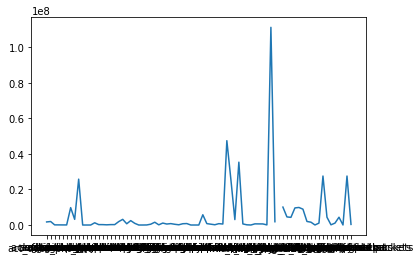

In [40]:
import matplotlib.pylab as plt

lists = sorted(freq_table.items())
x, y = zip(*lists)

plt.plot(x, y)
plt.show()

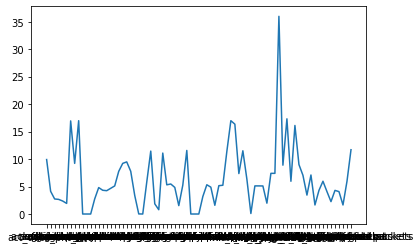

In [41]:
lists = sorted(freq.items())
x, y = zip(*lists)

plt.plot(x, y)
plt.show()

In [50]:
print("Correlation: \t\t\t\t\t ANOVA feature selection:")
for key1, key2 in zip(sort_freq, sort_freq_table):
    print(key1[0],"\t\t\t\t\t", key2[0])

Correlation: 					 ANOVA feature selection:
label 					 label
min packet length 					 init_win_bytes_backward
fwd packet length mean 					 fwd packet length max
avg fwd segment size 					 fwd packet length std
average packet size 					 subflow fwd bytes
fwd packet length min 					 total length of fwd packets
packet length mean 					 fwd packet length mean
urg flag count 					 avg fwd segment size
flow packets/s 					 max packet length
fwd packets/s 					 packet length std
down/up ratio 					 average packet size
fwd packet length max 					 packet length mean
flow bytes/s 					 packet length variance
ack flag count 					 fwd header length
bwd packet length min 					 min packet length
bwd packet length mean 					 total fwd packets
avg bwd segment size 					 subflow fwd packets
packet length std 					 min_seg_size_forward
max packet length 					 bwd packet length mean
bwd packet length std 					 avg bwd segment size
bwd packet length max 					 fwd packet length min
init_win_bytes_forward 	